# Lab 4: Working with 'real' data

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics

#this sets the size of the plot to something useful
# plt.rcParams["figure.figsize"] = (20,15)

In [147]:
hf = h5py.File('lab4/gammaray_lab4.h5', 'r') # import data
print(hf.keys())
data = np.array(hf.get('data'))
data[:,0]
hf.close() # close file

<KeysViewHDF5 ['data']>


## Problem 1

### 1) Import the data into your environment and create a few plots that can help one better understand the contents of the data. Note any noise.

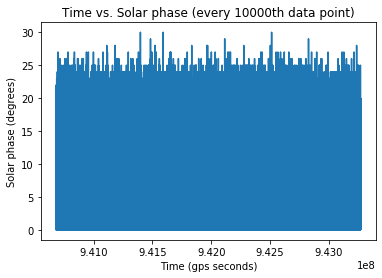

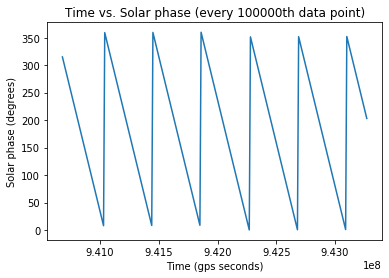

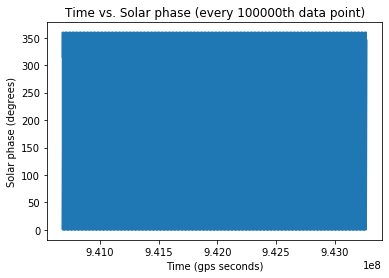

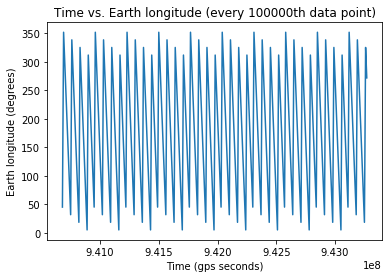

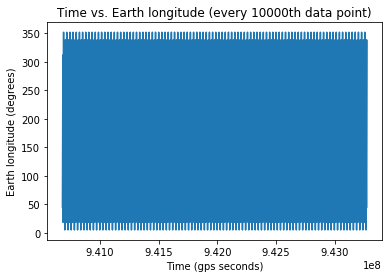

2593
7.1714


2592
2592


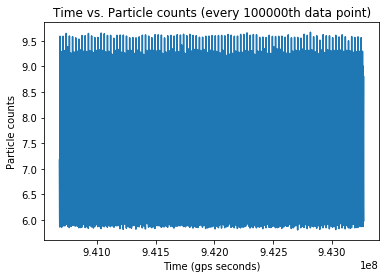

In [25]:
plt.xlabel('Time (gps seconds)')
plt.ylabel('Solar phase (degrees)')
plt.title('Time vs. Solar phase (every 10000th data point)')
plt.plot(data[0], data[3])
plt.show()
plt.xlabel('Time (gps seconds)')
plt.ylabel('Solar phase (degrees)')
plt.title('Time vs. Solar phase (every 100000th data point)')
plt.plot(data[0][::100000], data[1][::100000])
plt.show()
plt.xlabel('Time (gps seconds)')
plt.ylabel('Solar phase (degrees)')
plt.title('Time vs. Solar phase (every 100000th data point)')
plt.plot(data[0][::100], data[1][::100])
plt.show()

plt.title('Time vs. Earth longitude (every 100000th data point)')
plt.xlabel('Time (gps seconds)')
plt.ylabel('Earth longitude (degrees)')
plt.plot(data[0][::100000], data[2][::100000])
plt.show()
plt.xlabel('Time (gps seconds)')
plt.ylabel('Earth longitude (degrees)')
plt.title('Time vs. Earth longitude (every 10000th data point)')
plt.plot(data[0][::10000], data[2][::10000])
plt.show()

plt.title('Time vs. Particle counts (every 100000th data point)')
plt.xlabel('Time (gps seconds)')
plt.ylabel('Particle counts')
counts = []
print(len(data[0][::10000]))
print(statistics.mean(data[3][0:10000]))
num = int(len(data[3])/10000)
for i in range(num):
    counts.append(statistics.mean(data[3][i * 10000:(i + 1) * 10000]))
index = data[0][::10000]
thing = index[:-1]
plt.plot(index, counts)
plt.show()

Because the dataset holds nearly 25 million datapoints the computer could not make computations on somany values and even when it was able to, it displayed a useless graph that looked like one block of color. In order to accomodate for this issue I graphed every 100,000 datapoints in the dataset which give me a more detailed view of what my graph looks like and I put each of the different columns of data with respect to time.

My first graph is Time versus Solar phase. What I noticed about this graph is a consistently repeating pattern of reversed, sawtooth behavior. Its period apperas to be about every .005 * 10^8 seconds and its peak hit nearly the same value everytime but in the period is only so large because it is every 100,000 data points. The expected period is 90 minutes or 5400 seconds. I also confirmed that this repeating behavior was consistent by plotting another graph of Time versus Solar phase but for every 10,000 datapoints so I can view a larger subset of the data and the same sawtooth pattern appeared. Somethign to note about this graph was that the sawtooth shape displaces downward more and more, which is represented by the larger sawtooth shaped in the graph of every 10,000 datapoints, but it resets at the starting height soon thereafter. This behavior is explained because we are looking at the position of the sun relative to the orbit so of course as we orbit the sun's position with respect to the orbit will vary between 0 to 360 degrees. Thus, the sun will start at a position 360 degrees from orbit and in a linear fashion (sawtooth shape) the orbit will slowly move so that the angle to the soon slowly reach 0. Then, when it reaches zero it shoots all the way back up to 360 degrees instantly because it continues this orbiting pattern rather than stopping and going backwards.

My second graph is Time versus Earth longitude and this graph also appeared to display a repeating trianglular wave pattern. Its period was about .0025 * 10^8 seconds and in each phase there were four triangle waves, each of which were displaced lower than its previous triangular wave. This period is, in reality, much smaller and should be 5400 seconds. It is only this large because we are plotting every 100,000 data points because it this machine is not capable of plotting the millions of data points that exist. Again I confirmed that the pattern of this graph was consistent throughout the entire dataset by plotting every 10,000 data points and seeing that the same pattern persists. This behavior is explained because the orbit of earth is an eclipse and so it orbits the earth in a fashion that has the angle move between a range of 0 to 360 degrees.

My third graph is Time versus Particle counts is the most unique of the three graph types because there appears to be no repeating or continuous patterns. Because of the lack of pattern instead of taking every 100,000 data points we take every average of 100,000 data points to yield our graph. The particle counts seem to be very random with respect to time and even zoomed out, at every average of 10,000 data points, we can see that the shape of the data is random. This behavior is explained because the gamma-ray satellite is low orbit so many of the signals could be blocked by earth which would give this sporatic dataset. There appears to be signal contamination in this dataset because there are certain datapoints and groups of datapoints that deviate from the percieved average of the data. I plan to build a background pdf using a Poisson distrbiution because you are measuring the number of events occur over time which are discrete, independent events.

### 2) Find and describe where the background ic not consistent actoss the dataset.

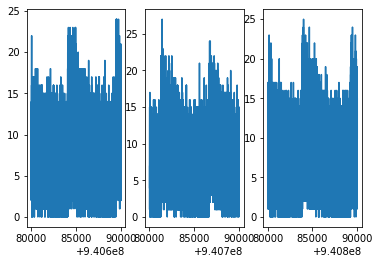

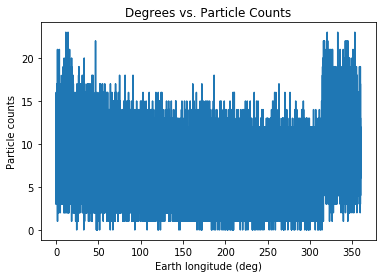

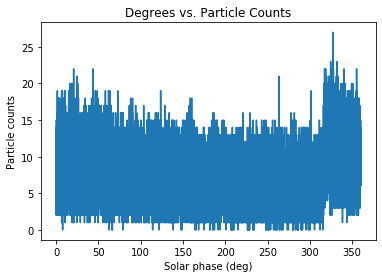

In [53]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(data[0][0:100000], data[3][0:100000])
ax[1].plot(data[0][1000000:1100000], data[3][1000000:1100000])
ax[2].plot(data[0][2000000:2100000], data[3][2000000:2100000])
plt.show()
# do this shit

index = []
for i in range(54000):
    index.append(data[2][i])
count = 0
# check if i should start this shit somewhere else
temp = []
for i in range(54000):
    temp.append(data[3][i])
    count += 1
plt.plot(index, temp)
plt.title('Degrees vs. Particle Counts')
plt.ylabel('Particle counts')
plt.xlabel('Earth longitude (deg)')
plt.show()

index = []
for i in range(1012320, 1062936):
# for i in range(50616):
    index.append(data[1][i])
count = 0
temp = []
for i in range(1012320, 1062936):
# for i in range(50616):
    temp.append(data[3][i])
    count += 1
plt.plot(index, temp)
plt.title('Degrees vs. Particle Counts')
plt.ylabel('Particle counts')
plt.xlabel('Solar phase (deg)')
plt.show()

At first appearance, due to the discrete and independent nature of the data I believed the distribution of counts with respect to time would be a Poisson distribution. However, I failed to consider the continuity of the background in that I began to notice that the data resembled different distributions at different times. For example, above I have plotted the particle counts versus earth longitude and then particle counts versus solar phase. What I observed is that between 50-310 degrees we have a relatively normal distribution but outside of these bounds we see the Poisson distribution that I had first observed. This is very important for us because when we model the data we have to consider time dependence because according to the time the distribution of the data changes.

### 3)

7.1
260


25920001


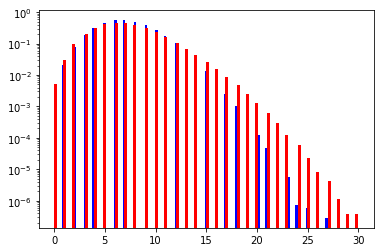

In [65]:
# mu = statistics.mean(data[3][::100000])
# plt.plot(data[0][::100000], stats.poisson.pmf(data[3][::100000],mu))
# plt.show()
# mu = statistics.mean(data[3])
# print(mu)
mu1 = statistics.mean(data[3][::100000])
print(mu1)
print(len(data[3][::100000]))
# std = statistics.stdev(data[3][::100000])
d = stats.poisson.rvs(mu1, size = 26000000)
print(len(data[3]))
plt.hist(d, 100, density=True, color='b')
plt.hist(data[3], 100, density=True, color='r')
# plt.hist(counts, 10, density=True, color='r')
plt.yscale('log')
plt.show()

Here I plotted the graph of a Poisson distribution with the average value of my particle count dataset. And then overlayed on top of that is the distribution of my actual particle count data with respect to time. This plot was done on a log scale and it is very clear to see that the distribution of the data does not follow the distribution of the Poisson distribution. More specifically the distribution of the particle counts data has many more measurements recorded at high particle counts. Thus I would say the model is not a very good model of the background. To accomodate this issue we will create two distributions: Normal and Poisson.

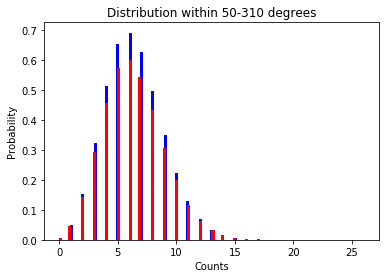

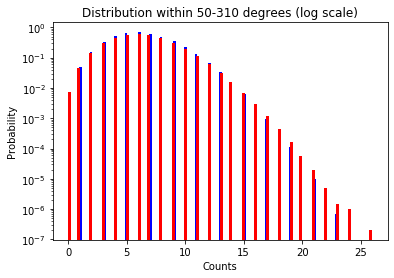

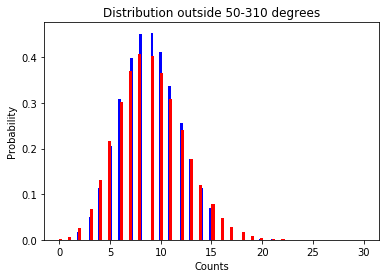

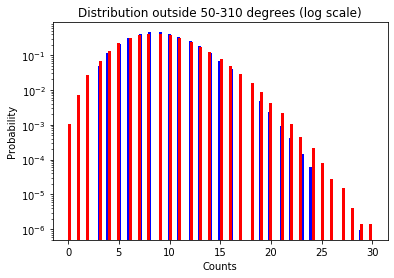

pois7199521
norm18720480
9.047505521547892
6.347297344939873


In [129]:
poisOut = []
poisIn = []
for i in range(len(data[2])):
    if data[2][i] < 50 or data[2][i] > 310:
        poisOut.append(data[3][i])
    else:
        poisIn.append(data[3][i])
muP = statistics.mean(poisOut)
muN = statistics.mean(poisIn)
c = stats.poisson.rvs(muN, size=len(poisIn))
plt.hist(c, 100, density=True, color='b')
plt.hist(poisIn, 100, density=True, color='r')
# plt.yscale('log')
plt.title('Distribution within 50-310 degrees')
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.show()
plt.hist(c, 100, density=True, color='b')
plt.hist(poisIn, 100, density=True, color='r')
plt.yscale('log')
plt.title('Distribution within 50-310 degrees (log scale)')
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.show()

d = stats.poisson.rvs(muP, size=len(poisOut))
plt.hist(d, 100, density=True, color='b')
plt.hist(poisOut, 100, density=True, color='r')
# plt.yscale('log')
plt.title('Distribution outside 50-310 degrees')
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.show()
plt.hist(d, 100, density=True, color='b')
plt.hist(poisOut, 100, density=True, color='r')
plt.yscale('log')
plt.title('Distribution outside 50-310 degrees (log scale)')
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.show()
print('pois' + str(len(poisOut)))
print('norm' + str(len(poisIn)))
print(muP)
print(muN)

If I split up the distribution of the background into two distinct Poisson distributions we find that my model fits well. In order to do this I iterated through every particle count datapoint and those corresponding to within 50-310 degrees of earht longitude were added to one 'poisOut' array and all other points were added to the 'poisIn' array and each were plotted against a Poisson distribution of their same respective averages. At face value you can see that values of the Poisson distribution nicely match each distribution and even viewing the graphs with a log scale we can see that the graphs fit nicely.

### 4)

In [139]:
sig5 = 1 - stats.norm.cdf(5)
print(sig5)
out5Sig = stats.poisson.ppf(1-sig5, muP)
in5Sig = stats.poisson.ppf(1-sig5, muN)
print(out5Sig)
print(in5Sig)

2.866515719235352e-07
28.0
22.0


## Problem 2

### 1) Download data

In [178]:
hf = h5py.File('lab4/images.h5', 'r') # import data
print(hf.keys())
data2 = np.array(hf.get('imagestack'))
print(np.shape(data2))
# print(np.shape(data2[:,:,1]))
# print(hf)
# print(data2[:,:,1])
hf.close() # close file

<KeysViewHDF5 ['image1', 'imagestack']>
(200, 200, 10)


### 2) Explore data. Signal contamination? Time dependence? Spatially consistent?

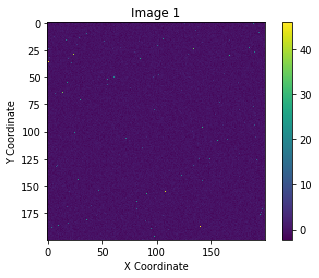

(200, 200, 9)
0
1
2
3
4
5


6
7
8


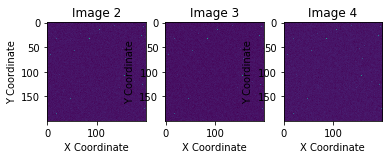

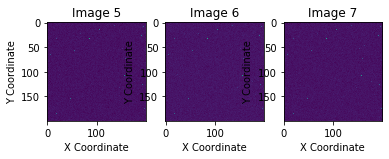

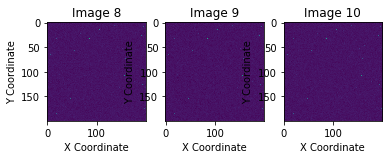

In [214]:
# fig, ax = plt.subplots(1, 1)
# h = ax.hist2d(data2[:,0,0],data2[0,:,0],bins=100, density=True);
# ax.set_aspect('equal', 'box')
# # plt.xlim([-3 , 3])
# # plt.ylim([-3 , 3])
# # plt.title("2D Histogram of positional uncertainty", fontsize = 24)
# # plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
# # plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
# plt.colorbar(h[3], ax=ax)
# plt.show()

plt.title('Image 1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.imshow(data2[:,:,0])
plt.colorbar()
plt.show()
dataRest = data2[:,:,1:10]
print(np.shape(dataRest))
for i in range(3):
    fig, ax = plt.subplots(1, 3)
    for j in range(3):
        ax[j].set_title('Image ' + str((i*3) + j + 2))
        ax[j].set_xlabel('X Coordinate')
        ax[j].set_ylabel('Y Coordinate')
        print((i*3) + j)
        ax[j].imshow(dataRest[:,:,(i*3) + j])

All 10 images appear in a similar fashion to the graph plotted above for image 1. I have plotted the data so the x and y values are the indices of the data points and the intensity/color fo the actual data point is the value of the data point. You can see that attached is a color wheel that helps explain the data and scattered in the data is many greenish/blueish specks in a relatively purple background. However, occasionally there is a yellow data point where a star burns very brightly which is why I believe there is signal contamination where these bright points are outliers. Across all 10 images the distribution of brightness seems very similar and rather uniform and thus the background is time independent. These images captured data at all of the same times and thus within one picture thebackground is time independent. With all of the images being so similar to each other the images appear to be spacially consistent. I plan to calculate the background pdf by collecting every data point across all of the images and thus plotting the probability distribution of different brightnesses. I want to do this across all images so my sample space is larger and thus I have more reliable data.

0.03344376540373896
0.9908606231001965


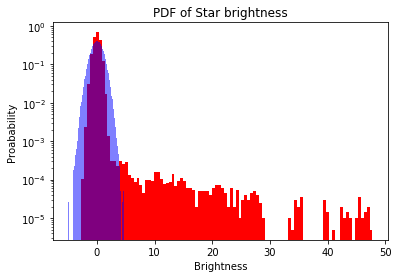

-2.709336827866645


In [236]:
fullData = []
for i in range(10):
    for j in range(200):
        for k in range(200):
            fullData.append(data2[j,k,i])
plt.yscale('log')
plt.hist(fullData, 100, density=True, color='r')
meanStar = statistics.mean(fullData)
stdStar = statistics.stdev(fullData)
print(meanStar)
print(stdStar)
plt.xlabel('Brightness')
plt.ylabel('Proabability')
plt.title('PDF of Star brightness')
g = stats.norm.rvs(meanStar, size=len(fullData))
plt.hist(g, 100, density=True, color='b', alpha=.5)
plt.show()
print(np.min(fullData))

### 3)

### 4)